# Project Title : Industrial Copper Modeling

Skills : Python scripting, Data Preprocessing, EDA, Streamlit 

Domain : Manufacturing

## Problem Statement
The copper industry deals with less complex data related to sales and pricing. However, this data may suffer from issues such as skewness and noisy data, which can affect the accuracy of manual predictions. Dealing with these challenges manually can be time-consuming and may not result in optimal pricing decisions. A machine learning regression model can address these issues by utilizing advanced techniques such as data normalization, feature scaling, and outlier detection, and leveraging algorithms that are robust to skewed and noisy data. 

Another area where the copper industry faces challenges is in capturing the leads. A lead classification model is a system for evaluating and classifying leads based on how likely they are to become a customer. You can use the STATUS variable with WON being considered as Success and LOST being considered as Failure and remove data points other than WON, LOST STATUS values.

## Solution
The solution includes the following steps:
1. **Data Exploration**: Exploring skewness and outliers in the dataset.
2. **Data Preprocessing**: Transform the data into a suitable format and perform any necessary cleaning and pre-processing steps.
3. **Regression Model**: Develop a machine learning regression model which predicts continuous variable ‘Selling_Price’.
4. **Classification Model**: Develop a machine learning classification model which predicts Status: WON or LOST.
5. **Streamlit Application**: Create a streamlit page where you can insert each column value and you will get the Selling_Price predicted value or Status(Won/Lost)


## About the Data:
1. `id`: This column likely serves as a unique identifier for each transaction or item, which can be useful for tracking and record-keeping.
2. `item_date`: This column represents the date when each transaction or item was recorded or occurred. It's important for tracking the timing of business activities.
3. `quantity tons`: This column indicates the quantity of the item in tons, which is essential for inventory management and understanding the volume of products sold or produced.
4. `customer`: The "customer" column refers to the name or identifier of the customer who either purchased or ordered the items. It's crucial for maintaining customer relationships and tracking sales.
5. `country`: The "country" column specifies the country associated with each customer. This information can be useful for understanding the geographic distribution of customers and may have implications for logistics and international sales.
6. `status`: The "status" column likely describes the current status of the transaction or item. This information can be used to track the progress of orders or transactions, such as "Draft" or "Won."
7. `item type`: This column categorizes the type or category of the items being sold or produced. Understanding item types is essential for inventory categorization and business reporting.
8. `application`: The "application" column defines the specific use or application of the items. This information can help tailor marketing and product development efforts.
9. `thickness`: The "thickness" column provides details about the thickness of the items. It's critical when dealing with materials where thickness is a significant factor, such as metals or construction materials.
10. `width`: The "width" column specifies the width of the items. It's important for understanding the size and dimensions of the products.
11. `material_ref`: This column appears to be a reference or identifier for the material used in the items. It's essential for tracking the source or composition of the products.
12. `product_ref`: The "product_ref" column seems to be a reference or identifier for the specific product. This information is useful for identifying and cataloging products in a standardized way.
13. `delivery date`: This column records the expected or actual delivery date for each item or transaction. It's crucial for managing logistics and ensuring timely delivery to customers.
14. `selling_price`: The "selling_price" column represents the price at which the items are sold. This is a critical factor for revenue generation and profitability analysis.

In [1]:
# Imports

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler 

import warnings 
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
df = pd.read_csv('/kaggle/input/copper-dataset/Copper_Set.xlsx - Result 1.csv')

# df = pd.read_excel(r'/kaggle/input/copper-dataset-xlsx/Copper_Set.xlsx')
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


## Data Exploration 
checking the skewness of the data

In [3]:
df.shape

(181673, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


<Axes: >

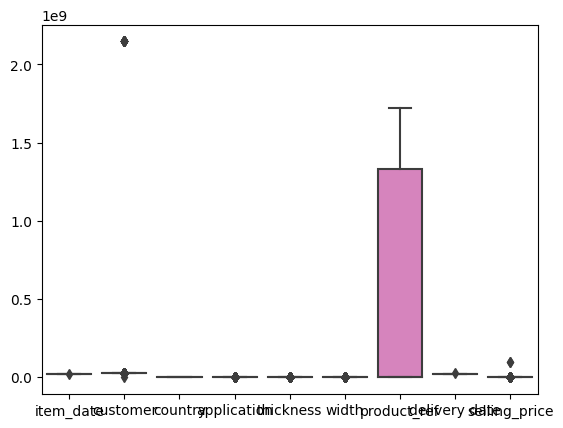

In [6]:
sns.boxplot(data = df)

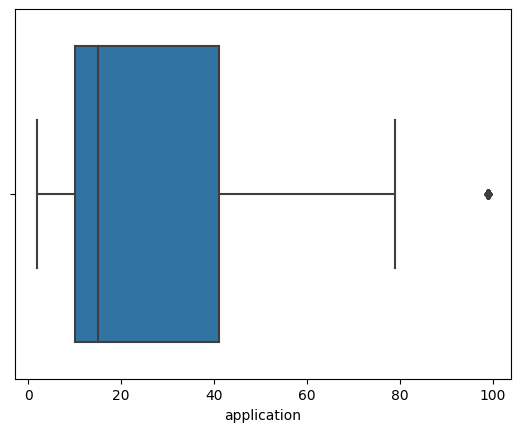

In [7]:
ax = sns.boxplot(x = 'application',
            data = df)

<Axes: ylabel='selling_price'>

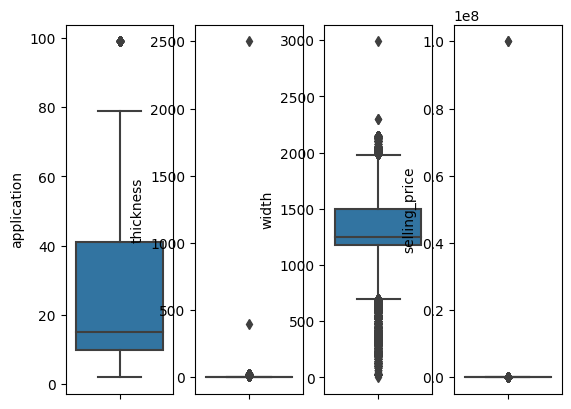

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=4)
sns.boxplot(y='application', data=df, ax=axes[0])
sns.boxplot(y='thickness', data=df, ax=axes[1])
sns.boxplot(y='width', data=df, ax=axes[2])
sns.boxplot(y='selling_price', data=df, ax=axes[3])

## Data Cleaning and Preprocessing 

### Looking at Missing Values

In [9]:
# missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


###  Change the data types columns

In [10]:
# Change the data types columns
df['item_date'] = df['item_date'].astype('datetime64[ns]')
# df['quantity tons'] = df['quantity tons'].astype('float64')
# df['customer'] = df['customer'].astype('int64')
# df['country'] = df['country'].astype('int64')
df['status'] = df['status'].astype('category')
df['delivery date'] = df['delivery date'].astype('datetime64[ns]')

# df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
# df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
# df['country'] = pd.to_numeric(df['country'], errors='coerce')
# df['application'] = pd.to_numeric(df['application'], errors='coerce')
# df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
# df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
# df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
# df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181671 non-null  object        
 1   item_date      181672 non-null  datetime64[ns]
 2   quantity tons  181672 non-null  float64       
 3   customer       181672 non-null  float64       
 4   country        181645 non-null  float64       
 5   status         181671 non-null  category      
 6   item type      181673 non-null  object        
 7   application    181649 non-null  float64       
 8   thickness      181672 non-null  float64       
 9   width          181673 non-null  float64       
 10  material_ref   103754 non-null  object        
 11  product_ref    181673 non-null  int64         
 12  delivery date  181672 non-null  object        
 13  selling_price  181672 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(7), int64

In [11]:
# material_ref has large set of null values, so replacing them with unknown 
df['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values as they are less than 1% of data which can be neglected
df = df.dropna()

In [12]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64
(181635, 14)


In [13]:
df.head()
df.shape

(181635, 14)

In [14]:
df_clean=df.copy()

## Plotting 

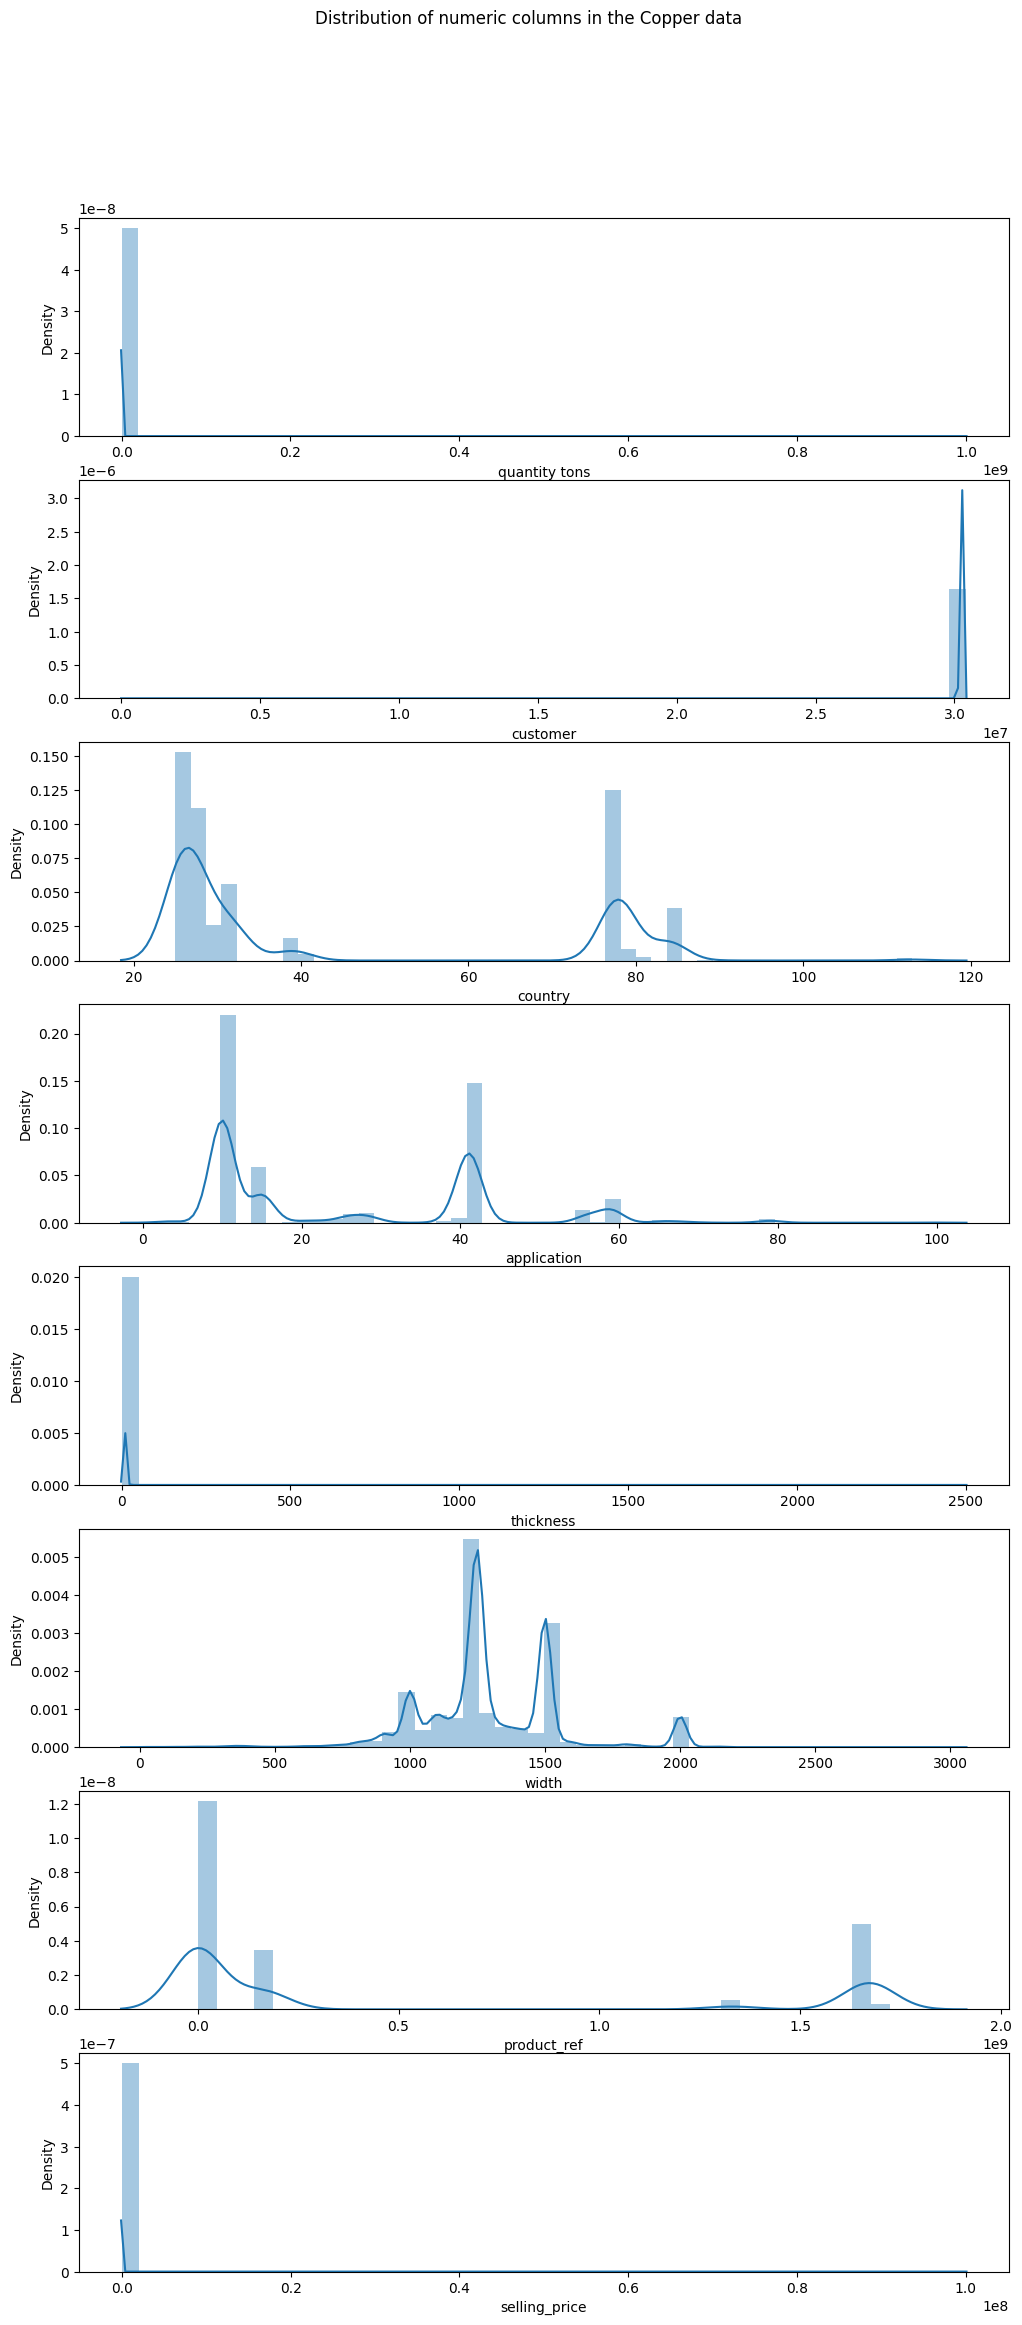

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Create a figure with subplots
fig, axes = plt.subplots(len(numeric_columns), 1,figsize=(12, 26))

# Plot a distplot for each numeric column
for i, column in enumerate(numeric_columns):
    sns.distplot(df[column], ax=axes[i])

# Set the figure title and labels
fig.suptitle('Distribution of numeric columns in the Copper data')
fig.subplots_adjust(top=0.9)

# Show the plot
plt.show()

## Rescaling Data

In [16]:
# # Create a MinMaxScaler object
# scaler = MinMaxScaler()

# # Normalize your data
# normalized_data = scaler.fit_transform(df)

# # Convert the normalized data back to a pandas dataframe
# normalized_df = pd.DataFrame(normalized_data, columns=df.columns)